<a id = 'top'></a>

[Configure Notebook](#configure)  
***

# Cross-trial SNR checks by cell  
###### For each ROI, plot average displacement normalized to roi radius as mask.



 
>[Calculate SNR for each ROI](#calculate)  
>[Plot](#plot)  




##### Set paths 


In [2]:
experiment = 'sp042616a'

qcGitDir = '/Users/Stan/Documents/myPiriform/notebooks/qc/{0}/'.format(experiment)
sframePath = '/Users/Stan/Desktop/{0}/tracesDFfromTrial/sframe_processed'.format(experiment)

rawTraces_e1_Path = '/Users/Stan/Desktop/{0}/e1_traces_dict.dat'.format(experiment)
rawTraces_e2_Path = '/Users/Stan/Desktop/{0}/e2_traces_dict.dat'.format(experiment)
workflowDict_e1_Path = '/Users/Stan/Desktop/{0}/workflow_dict_e1.dat'.format(experiment)
workflowDict_e2_Path = '/Users/Stan/Desktop/{0}/workflow_dict_e2.dat'.format(experiment)


maskPath = '/Users/Stan/Desktop/{0}/segmentation/sp042616amaskSoFar.dat'.format(experiment)


##### save/load

In [11]:
workflow_dict = pickle.load(open(workflowDict_e2_Path))

mask = pickle.load(open(maskPath))

<a id = 'calculate'></a>
##### SNR

[back to top](#top)

In [12]:
from spUtils.get_normalized_traces_submodule import getMaxEvents
from spUtils import getSNR

traces = next(spUtils.gen_dict_extract('corrected_rois', workflow_dict))
numCells = workflow_dict['numCells']
events = workflow_dict['events']['pos_events']

maxEvents = getMaxEvents(events,traces)
numCells, numTrials = maxEvents.shape[1:]

In [13]:
from collections import defaultdict
#baselined1 traces
allSNRs = defaultdict(list)

for cell in range(numCells): 
    for trial in range(numTrials):
        allSNRs[cell].append(getSNR(traces,maxEvents,cell,trial))
    allSNRs[cell]=list(np.hstack(allSNRs[cell]))


In [14]:
maxEventNum = max(len(allSNRs[cell]) for cell in range(numCells))
#initiaalize df with size == greatest# of  encountered events  in allSNRs.
df = pd.DataFrame(pd.Series(allSNRs[0]), index = range(maxEventNum))
#fill all subsequent cells
for cell in range(numCells)[1:]:
    df[cell]= pd.Series(allSNRs[cell])
mean = pd.DataFrame(df.mean(axis = 0))
mean.rename(columns ={0:'mean'}, inplace=True)
mean.index.rename('cellID', inplace=True)

<a id = 'plot'></a>
##### Plot

[back to top](#top)

AttributeError: max must be larger than min in range parameter.

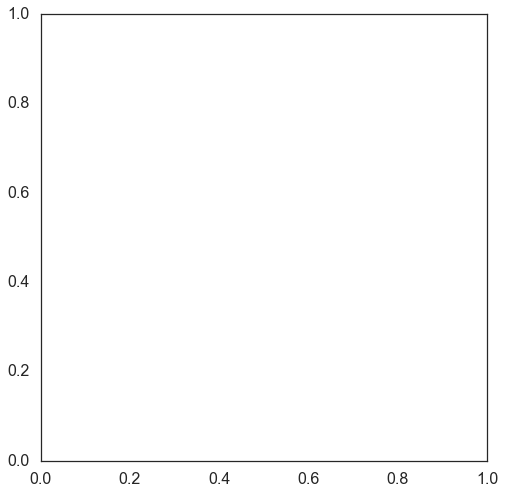

In [15]:
#Show distribution
from pandas.tools.plotting import table
b = pd.DataFrame(mean['mean']).describe()
f,(ax1) = plt.subplots(1,1, figsize = (8,8))
ax1.hist(mean['mean'], bins = 20)
table(ax1, np.round(b, 1),loc='upper right', colWidths=[0.1])

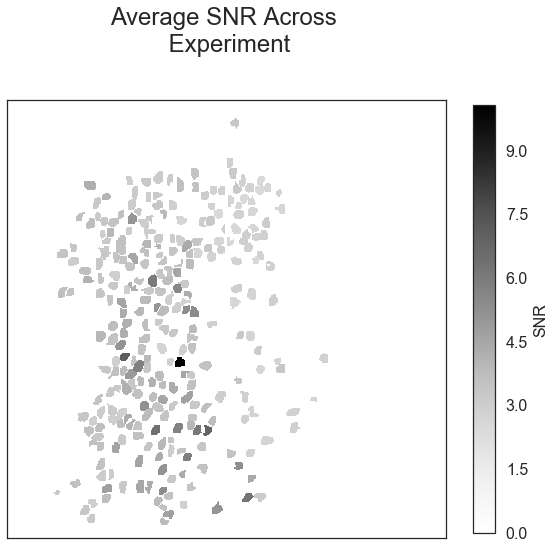

In [16]:

f,ax1 = plt.subplots(1,1, figsize = (8,8))
#f.suptitle('Average SNR Across \n Experiment', fontsize=24, x=.5, y=1.2)

masktoPlot = np.zeros_like(mask).astype(float)
for _cellID,meanVal in enumerate(mean['mean'][1:]):#exclude background
    cellID = _cellID+1
    masktoPlot[mask==cellID]=meanVal
    
#plot and format each plot
image = ax1.imshow(masktoPlot, vmin = 0)
image.axes.get_xaxis().set_visible(False)
image.axes.get_yaxis().set_visible(False)
ax1.set_title('Average SNR Across \n Experiment', fontsize = 24, y = 1.1)

from pandas.tools.plotting import table
cbar = plt.colorbar(image, shrink = 0.83)
cbar.set_label('SNR', fontsize = 16)
#cb = fig.colorbar(quadmesh,ax=ax, shrink=.5, pad=.2, aspect=10)
plt.tight_layout()

plt.savefig(qcGitDir + 'SNRmaskAnesth.png',bbox_inches='tight', pad_inches=0.5 )

<a id = 'configure'></a>
##### Configure 

[back to top](#top)  

In [1]:
import sys
sys.path.append('/users/stan/documents/')
import os
from glob import glob
import copy
import pandas
import numpy as np

from d_code.imaging.io import tifffile
import matplotlib.pylab as plt
from joblib import Parallel, delayed
from collections import defaultdict
from scipy import signal
from time import time
import cPickle as pickle
import spUtils
import seaborn as sns


import graphlab as gl
gl.canvas.set_target('ipynb')
import pandas as pd

sns.set_palette("husl")
sns.set_style("white")
sns.set_context("poster")


%matplotlib inline

#style notebook
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

A newer version of GraphLab Create (v1.9) is available! Your current version is v1.8.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.
[INFO] This non-commercial license of GraphLab Create is assigned to stanlp86@gmail.com and will expire on October 28, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-5001 - Server binary: /Users/Stan/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1462476671.log
[INFO] GraphLab Server Version: 1.8.1
